# Regressão linear

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Leitura dos dados
- X representa os M³ do apartamento que possuem uma variação de 40m³ até 120 m³
- y é o preço do apartamento

In [2]:
X = np.random.randint(low=40, high=120, size=(20,1))
y = (3 * X + np.random.randint(low=100,high=150, size=(20,1))) * 1000

Text(0, 0.5, 'Preço')

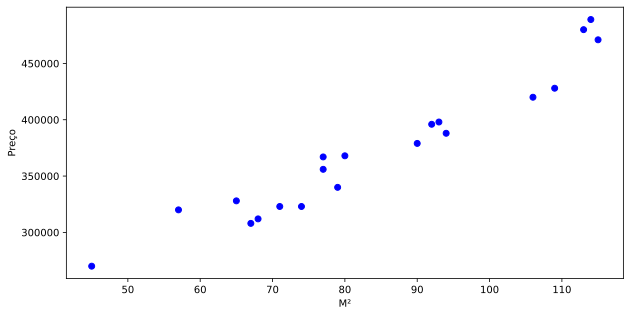

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X, y, c='b')
plt.xlabel("M²")
plt.ylabel("Preço")

## Representando uma Reta

In [4]:
def predict(alpha, beta, X):
    return alpha * X + beta

## Escolhendo melhor alpha e beta

In [5]:
tamanho = len(X)
X_b = np.c_[np.ones((tamanho, 1)), X]  # add x0 = 1 to each instance
X_b

array([[  1.,  74.],
       [  1.,  80.],
       [  1.,  67.],
       [  1.,  79.],
       [  1., 106.],
       [  1.,  77.],
       [  1., 114.],
       [  1.,  93.],
       [  1.,  77.],
       [  1.,  65.],
       [  1.,  68.],
       [  1., 109.],
       [  1., 115.],
       [  1., 113.],
       [  1.,  57.],
       [  1.,  94.],
       [  1.,  92.],
       [  1.,  90.],
       [  1.,  71.],
       [  1.,  45.]])

In [6]:
X_b.T.dot(X_b)

array([[2.00000e+01, 1.68600e+03],
       [1.68600e+03, 1.49784e+05]])

In [7]:
# Método dos mínimos quadrados
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[125353.02187035],
       [  2940.05905255]])

## Ajustando a reta

In [9]:
alpha = theta_best[1] # inclinação
beta = theta_best[0]

In [10]:
y_hat = predict(alpha=alpha, beta=beta, X=X)

In [11]:
y_hat

array([[342917.39175877],
       [360557.74607405],
       [322336.97839095],
       [357617.6870215 ],
       [436999.28144025],
       [351737.56891641],
       [460519.75386063],
       [398778.51375715],
       [351737.56891641],
       [316456.86028586],
       [325277.03744349],
       [445819.45859789],
       [463459.81291317],
       [457579.69480808],
       [292936.38786549],
       [401718.5728097 ],
       [395838.45470461],
       [389958.33659951],
       [334097.21460113],
       [257655.67923493]])

## Plotando os Dados

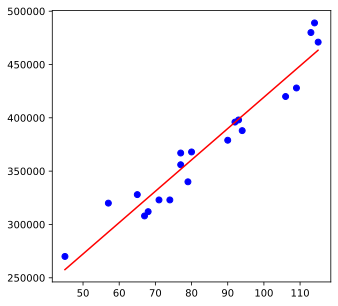

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X, y, c='b')
plt.plot(X, y_hat, 'r')

## Como implementar uma regressão linear usando o Scikit-learn?

In [13]:
from sklearn.linear_model import LinearRegression

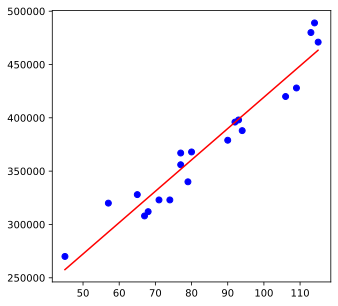

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X, y, c='b')
plt.plot(X, y_hat, 'r')

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X, y)

LinearRegression()

In [17]:
y_hat = lr.predict(X)

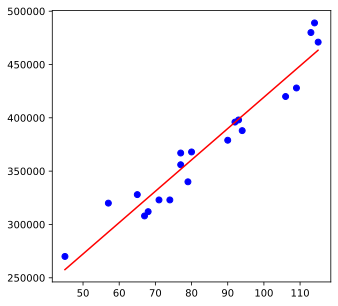

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X, y, c='b')
plt.plot(X, y_hat, 'r')

In [19]:
print("Training score: {:.2f}".format(lr.score(X, y)))

Training score: 0.93


## Avaliando meu modelo de regressão

In [20]:
from sklearn import metrics

In [21]:
print('MAE:', metrics.mean_absolute_error(y, y_hat))
print('MSE:', metrics.mean_squared_error(y, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_hat)))

MAE: 13652.047242037046
MSE: 241134954.66541213
RMSE: 15528.520685030244
